# Intro to Helium lines diagnostics - Slab Model

#### Hi all! If you are here, it means you have probably went through the lectures from the previous schools and more recently, this school! One of the main points that we made is that modeling the spectrum formation for He 10830 and He D3 is extremely complicated and requires knowledge of many details, most importantly:
- Ionizing radiation field coming both from below and the above 
- Actual number density of atoms present in the object (slab, loop, cloud...), as well as the object's physical dimensions 

#### Even if we had these two and somehow knew (or parametrized them), the NLTE solution would be very complicated and would take a loot of time. It would also probably be quite ambiguous. Furthermore, some of the parameters we are interested in (velocity, magnetic field), are almost de-coupled from the NLTE problem. So we usually choose to parametrize our object using a so called slab model: 

<---- Figure Here ----> 

### Equations for the Slab Model:

#### As you have seen above, the slab is basically a finite "obstacle", through which the light propagates on it's path toward the observer. 

#### As always, we model our spectrum by solving the radiative transfer equation (RTE):

### $$ \frac{dI_\lambda}{d s} = j_\lambda - \chi_\lambda I_\lambda $$

#### When working with the slab model it is common to define first, monochromatic optical depth, as: 

### $$ d \tau_\lambda = -\chi_\lambda ds $$

#### And then the mean optical depth, $\tau$, so that: 

### $$ d \tau_\lambda = d \tau \phi_\lambda $$

#### We will always assume that $\phi_\lambda$ is constant throughout the slab so we can also write the same relationship for the total optical depth and monochromatic optical depth:

### $$ \tau_\lambda = \tau \phi_\lambda $$

#### So called formal solution of the radiative transfer equation looks like this: 

### $$ I^{+}_\lambda = I^0_\lambda e^{-\tau_\lambda} + \int_0^{\tau_\lambda} S(t) e^{-\tau_\lambda} d \tau_\lambda   $$

#### We almost exclusively assume that the source function is constant throughout the slab which leads to a simple solution (5 mins to show this yourself?):

### $$ I^+_\lambda = I^0_\lambda e^{-\tau_\lambda} + S(1-e^{-\tau_\lambda})   $$

#### Here we have the following quantities that are actually *parameters* of the slab model:

- $I^+_\lambda$ is the input radiation, i.e. the boundary condition. If we are above the limb this will be zero and if we are on the disk, it will depend on the incoming photospheric radiation. Generally it is wavelength dependent but He 10830 radiation coming from the quiet Sun is very similar to the continuum radiation (i.e. the spectral line is very weak). 

- $S$ is the source function. We could use it as a free parameter. But since these objects generally only scatter the light, we can estimate the source function to be equal to the mean intensity. The higher the slab is above the Sun, the lower the source function will be. 

- $\tau$ is the mean optical depth of the slab in the given spectral line. It depends on the population of the lower level of the transition which is extremely tricky to get. That is why we will always use this optical depth as a free parameter. 

- $\phi_\lambda$ is (wavelength dependent) line emission / absorption profile. It is calculated on the given wavelength grid and is typically modeled by the so called voigt profile. To appropriately model this we need three parameters: line center position (which is theoretical line center position, modified by any line-of-sight motions), Doppler broadening (that depends on the thermal and turbulent motions), and line damping (that depends mostly on radiative damping but could, in principle also depend on collisional processes. It is customary to relate line center position to the *Line-of-sight velocity* and the Doppler broadening to the *thermal velocity* (which is not only thermal)



### Exercise 0: Calcualte Voigt profile for different parameter combinations

In [50]:
# Voigt function is a special function and can be calculated for given center, broadening and damping in the following way
# This is similar to what we did in the Milne-Eddington School.

from scipy.special import voigt_profile
# takes argument x, standard deviation sigma, and damping gamma

def voigt(center,doppler,damp,ll):
    
    # we often call this reduced wavelength:
    xx = (ll - center)/doppler
    return voigt_profile(xx,1.0/1.41,damp)

# We will go even more complicated, and make additional function, called "profile", that takes los velocity, thermal velocity
# and the damping as the arguments, as well as the rest wavelength of the line

def profile(vlos, vth, damp, ll0, ll):
    center = ll0*(1.-vlos/3E5) # assuming vlos is in km/s
    doppler = ll0 * vth/3E5 # again assuming vth in km/s
    
    return voigt(center,doppler,damp,ll)
    
    

### Now we can test this:

In [33]:
import matplotlib.pyplot as plt 
import numpy as np 

Text(0, 0.5, 'Line profile value')

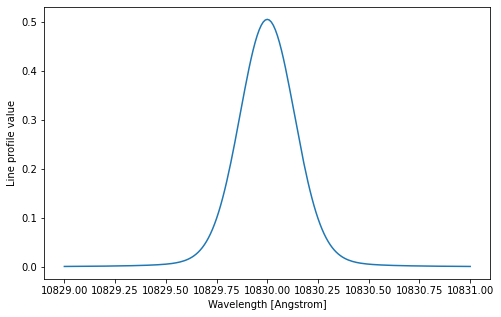

In [35]:
# A reasonable values for 10830 line would be:

ll0 = 10830. 
ll = np.linspace(10829.,10831.,201)
vlos = 0.0
vth = 5.0
damp = 0.1
plt.figure(figsize=[8,5])
phi_lambda = profile(vlos,vth,damp,ll0,ll)
plt.plot(ll,phi_lambda)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Line profile value")

### Few reality checks are always good! Let's check how doppler width and damping influence the shape of the absorption profile. 

Text(0, 0.5, 'Line profile value')

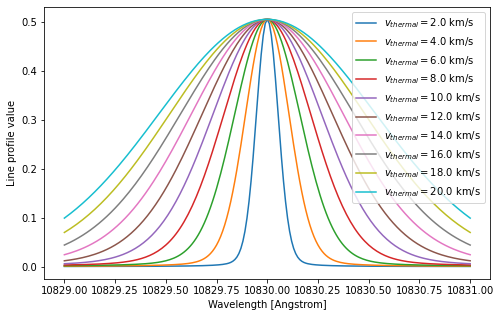

In [37]:
vth = np.linspace(2.0,20.0,10)

plt.figure(figsize=[8,5])
for i in range(0,10):
    phi_lambda = profile(vlos,vth[i],damp,ll0,ll)
    plt.plot(ll,phi_lambda,label='$v_{thermal} =$'+str(vth[i])+' km/s')
plt.legend()
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Line profile value")

Text(0, 0.5, 'Line profile value')

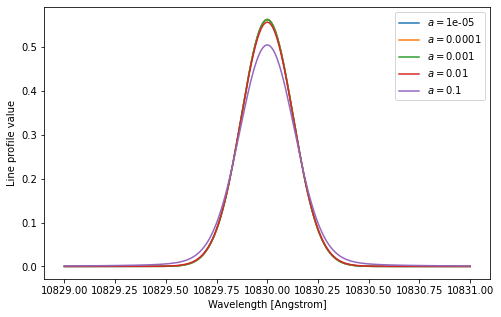

In [42]:
logdamp = np.linspace(-5.0,-1.0,5)
damp = 10.**logdamp
vth = 5.0

plt.figure(figsize=[8,5])
for i in range(0,5):
    phi_lambda = profile(vlos,vth,damp[i],ll0,ll)
    plt.plot(ll,phi_lambda,label='$a =$'+str(damp[i]))
plt.legend()
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Line profile value")

### Try plotting this one in log scale! 

#### Discuss a little bit, if there is time :-)

### Exercise 1: Implement slab model for 'wannabe' 10830 line

In [46]:
# Now we have a few more parameters, in addition to the thermal velocity, los velocity and damping

vlos = 0.0
vth = 5.0
damp = 0.1

# There is optical depth

tau = 1.0 # typical value

# Source function:

S = 1.0 # another typical value 

# Incoming intensity:

I0 = 0.0 # Let's say that incoming intensity is zero. What would this correspond to?



In [47]:
def slab_fwd(tau,S,I0,vlos,vth,damp,ll):
    phi = profile(vlos,vth,damp,10830.0,ll)
    I = I0 * np.exp(-tau*phi) + S* (1.0-np.exp(-tau*phi))
    return I

Text(0, 0.5, 'Intensity')

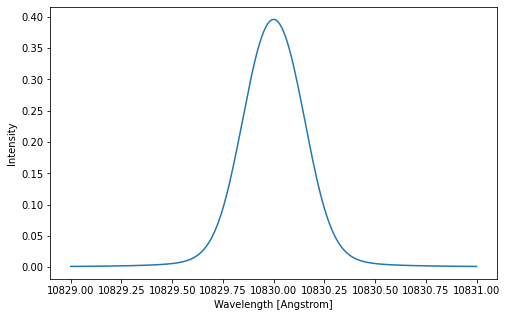

In [49]:
spectrum = slab_fwd(tau,S,I0,vlos,vth,damp,ll)
plt.figure(figsize=[8,5])
plt.plot(ll,spectrum)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Intensity")

### It looks same as profile! Why did we even do this? (Discuss 5-7 minutes)

### Let's plot for different parameters and see if anything changes. Let's first vary optical depth.



In [53]:
vlos = 0.0
vth = 5.0
damp = 0.1
tau = np.linspace(0.1,10.0,10)
S = 1.0 
I0 = 0.0 

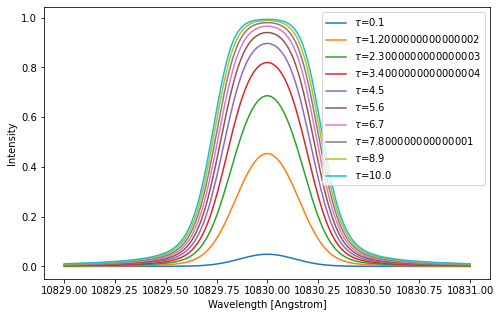

In [55]:

plt.figure(figsize=[8,5])
for i in range(0,10):
    spectrum = slab_fwd(tau[i],S,I0,vlos,vth,damp,ll)
    plt.plot(ll,spectrum,label='$\\tau$='+str(tau[i]))
    plt.legend()
    plt.xlabel("Wavelength [Angstrom]")
    plt.ylabel("Intensity")

### Explain this plot! (5 mins)

### Let's now vary the source function:

In [56]:
vlos = 0.0
vth = 5.0
damp = 0.1
tau = 1.0
S = np.linspace(0.5,5.0,10)
I0 = 0.0 

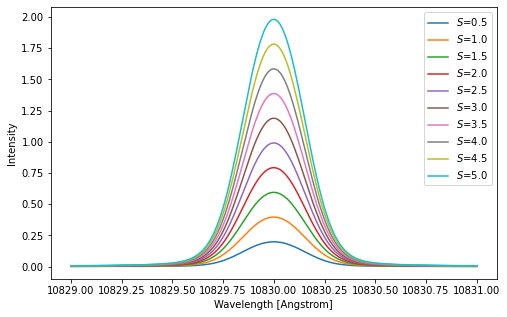

In [57]:

plt.figure(figsize=[8,5])
for i in range(0,10):
    spectrum = slab_fwd(tau,S[i],I0,vlos,vth,damp,ll)
    plt.plot(ll,spectrum,label='$S$='+str(S[i]))
    plt.legend()
    plt.xlabel("Wavelength [Angstrom]")
    plt.ylabel("Intensity")

### Seems like the source function only "scales" the spectrum. This is exactly what the equation tells us. 

### Let's then shake things up a bit, introduce some incoming intensity (on- disk observation). 

In [58]:
vlos = 0.0
vth = 5.0
damp = 0.1
tau = 1.0
S = np.linspace(0.2,2.0,10)
I0 = 1.0 

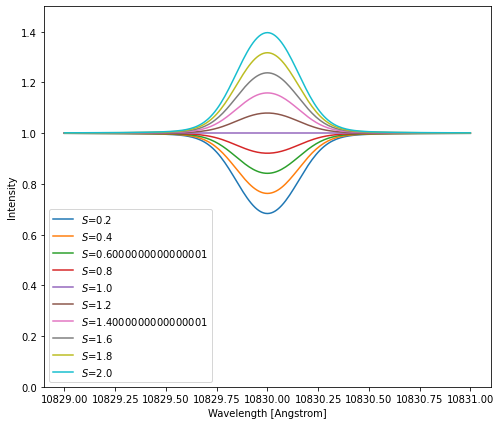

In [62]:
plt.figure(figsize=[8,7])
for i in range(0,10):
    spectrum = slab_fwd(tau,S[i],I0,vlos,vth,damp,ll)
    plt.plot(ll,spectrum,label='$S$='+str(S[i]))
    plt.ylim([0,1.5])
    plt.legend()
    plt.xlabel("Wavelength [Angstrom]")
    plt.ylabel("Intensity")

 ### Depending on the value of the source function, the line changes shape from the absorption line to the emission line. Why is this so? 
 
 ### To which physical situations would absorption end emission line (above the continuum) correspond to in solar conditions? 

## Step toward 10830 - making two components. 

#### You might be familiar with the fact that 10830 has a "blue" component and a "red" component. They originate from the same level but their "strengths" are different. Typical way to model them is to make a profile function consisting of two components with some scaling, something like this:

In [69]:
def profile_composite(vlos,vth,damp,ll):
    return profile(vlos,vth,damp,10830.25,ll) + 1./8. * profile(vlos,vth,damp,10829.09,ll)

In [70]:
def slab_composite(tau,S,I0,vlos,vth,damp,ll):
    phi = profile_composite(vlos,vth,damp,ll)
    I = I0 * np.exp(-tau*phi) + S* (1.0-np.exp(-tau*phi))
    return I

In [71]:
vlos = 0.0
vth = 5.0
damp = 0.1
tau = 1.0
S = 1.0
I0 = 0.0 
ll = np.linspace(10828.5,10831.5,301)


Text(0, 0.5, 'Intensity')

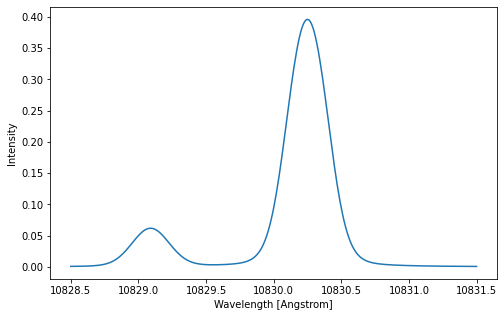

In [72]:
spectrum = slab_composite(tau,S,I0,vlos,vth,damp,ll)
plt.figure(figsize=[8,5])
plt.plot(ll,spectrum)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Intensity")